## Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

# DTree
from sklearn.tree import tree

In [2]:
training = pd.read_csv(../'test/training-person2.csv').fillna(0)
test = pd.read_csv('../test/test-person2.csv').fillna(0)
sumbit = test['person'].to_frame()

In [3]:
RANDOM_SEED = 12
TEST_SIZE_PERCENT = 0.1

In [4]:
y = training['label']
X = training.drop(axis=1, labels=['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PERCENT, random_state=RANDOM_SEED)

feature_list = list(X.columns)

In [45]:
rdf = tree.DecisionTreeClassifier(
    min_samples_split=4,
    criterion = 'entropy',
    random_state=RANDOM_SEED,
    max_leaf_nodes = 50
)

In [46]:
# Training
rdf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=50,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=12,
            splitter='best')

In [47]:
# Predict value
ret = rdf.predict_proba(X_test)

In [48]:
y_test_predictd = rdf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_test_predictd)

0.7897456480471748

In [49]:
rdf.score(X_test, y_test)

0.9418125643666323

In [50]:
# Predict value kaggle set
# Training
#rdf.fit(X, y)
ret = rdf.predict_proba(test.drop(axis=1, labels=['person']))

In [51]:
# Get proba
sumbit['label'] = pd.DataFrame(ret)[1]

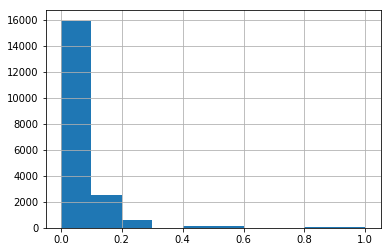

In [52]:
g = (sumbit['label']).hist()

In [53]:
# Get numerical feature importances
importances = list(rdf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 7)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: checkout             Importance: 0.3981006
Variable: first_event_days     Importance: 0.1600039
Variable: conversion           Importance: 0.0602727
Variable: last_event_days      Importance: 0.0601377
Variable: events_cout_last_week Importance: 0.0521824
Variable: device_type_categ    Importance: 0.044055
Variable: event                Importance: 0.0400477
Variable: city_categ           Importance: 0.0250316
Variable: brand listing        Importance: 0.0219649
Variable: viewed product       Importance: 0.0200751
Variable: events_mean_frec_last_week Importance: 0.0175327
Variable: visited site         Importance: 0.0138366
Variable: brand_categ          Importance: 0.0117979
Variable: top_searched_model_categ Importance: 0.0110696
Variable: staticpage           Importance: 0.0108038
Variable: model_brand_views_categ Importance: 0.0096384
Variable: search engine hit    Importance: 0.0086002
Variable: ad campaign hit      Importance: 0.0069535
Variable: region_categ         Im

In [55]:
#sumbit.to_csv('test/sumbit-2.csv', index=False)
import gc
gc.collect()

11386